In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autotime

time: 211 µs (started: 2021-11-15 23:34:05 -06:00)


In [2]:
data = pd.read_csv('suspicious tweets.csv')
data.head()

,message,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1
1,is upset that he can't update his Facebook by ...,1
2,@Kenichan I dived many times for the ball. Man...,1
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",1


time: 69.1 ms (started: 2021-11-15 23:34:05 -06:00)


In [3]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
0        6145   6133  Something for nothing doesn't exist. What will...    2
1       53855  53574                                @reatlas  Clean Me!    7

time: 53.4 ms (started: 2021-11-15 23:34:05 -06:00)


In [4]:
pd.value_counts(data['label'])

1    53855
0     6145
Name: label, dtype: int64

time: 2.48 ms (started: 2021-11-15 23:34:05 -06:00)


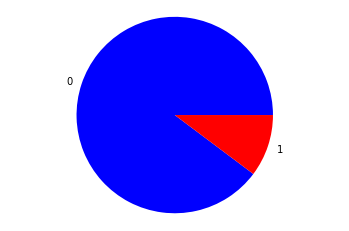

time: 58.5 ms (started: 2021-11-15 23:34:05 -06:00)


In [5]:
plt.pie(pd.value_counts(data['label']), labels = [0,1], colors = ['blue', 'red'])
plt.axis('equal')
plt.show()

In [6]:
import re
import nltk
from nltk.corpus import stopwords

def clean_sentence(sent):
    sentence = re.sub('<.*?>', ' ', sent) #removing html tags
    sentence = re.sub('[^\w\s]', ' ', sent) #removing punctutations
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sent) #removing single character
    sentence = re.sub(r'\s+', ' ', sent) #removing extra spaces
    sentence = re.sub('[^a-zA-Z]', ' ', sent) #removing numbers
    sentence = sentence.lower() #lower casing the words
    stop = stopwords.words('english') #introducing stopwords
    sentence = re.sub('[^A-Za-z0-9 ]+', ' ', sent) #removing special characters
    sentence = re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)', ' ', sent)
    sentence = ' '.join(text.lower() for text in sentence.split(' ')) #sometimes lowercasing doesn't work thus using this
    sentence = ' '.join(text for text in sentence.split() if text not in stop) #removing stopwords
    sentence = re.sub('\W+', ' ', sent)
    #sentence = ' '.join(text for text in sentence if text.isalnum())
    return sentence

time: 801 ms (started: 2021-11-15 23:34:05 -06:00)


In [7]:
data['message'] = data['message'].apply(clean_sentence)

time: 8.38 s (started: 2021-11-15 23:34:06 -06:00)


In [8]:
data.head()

,message,label
0,switchfoot http twitpic com 2y1zl Awww that s...,1
1,is upset that he can t update his Facebook by ...,1
2,Kenichan I dived many times for the ball Mana...,1
3,my whole body feels itchy and like its on fire,0
4,nationwideclass no it s not behaving at all i...,1


time: 19.6 ms (started: 2021-11-15 23:34:14 -06:00)


In [9]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

data['message'] = data['message'].apply(nltk.word_tokenize) #dividing strings into list of substrings

time: 4.99 s (started: 2021-11-15 23:34:14 -06:00)


In [10]:
data.head()

,message,label
0,"[switchfoot, http, twitpic, com, 2y1zl, Awww, ...",1
1,"[is, upset, that, he, can, t, update, his, Fac...",1
2,"[Kenichan, I, dived, many, times, for, the, ba...",1
3,"[my, whole, body, feels, itchy, and, like, its...",0
4,"[nationwideclass, no, it, s, not, behaving, at...",1


time: 11.4 ms (started: 2021-11-15 23:34:19 -06:00)


In [11]:
stemmer = PorterStemmer() #keeps only th root word
data['message'] = data['message'].apply(lambda x: [stemmer.stem(y) for y in x])

time: 9.77 s (started: 2021-11-15 23:34:19 -06:00)


In [12]:
data.head()

,message,label
0,"[switchfoot, http, twitpic, com, 2y1zl, awww, ...",1
1,"[is, upset, that, he, can, t, updat, hi, faceb...",1
2,"[kenichan, i, dive, mani, time, for, the, ball...",1
3,"[my, whole, bodi, feel, itchi, and, like, it, ...",0
4,"[nationwideclass, no, it, s, not, behav, at, a...",1


time: 5.3 ms (started: 2021-11-15 23:34:29 -06:00)


In [13]:
data['message'] = data['message'].apply(lambda x: ' '.join(x)) #removing words from the list
data.head()

,message,label
0,switchfoot http twitpic com 2y1zl awww that s ...,1
1,is upset that he can t updat hi facebook by te...,1
2,kenichan i dive mani time for the ball manag t...,1
3,my whole bodi feel itchi and like it on fire,0
4,nationwideclass no it s not behav at all i m m...,1


time: 865 ms (started: 2021-11-16 16:35:01 -06:00)


In [14]:
count_vector = CountVectorizer()
vectorised = count_vector.fit_transform(data['message']) #convert words to sparse matrix for the model to understand

time: 1.29 s (started: 2021-11-16 16:46:05 -06:00)


In [16]:
transform = TfidfTransformer()
vectorised = transform.fit_transform(vectorised) #converting into based on frequency (tf) or normalising 
#to reduce the effect of frequency (tf-idf) on the model.

time: 180 ms (started: 2021-11-16 16:51:03 -06:00)


In [17]:
#splitting the dataset into 80:20 ratio and shuffling them for random distribution.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectorised, data['label'], test_size= 0.2, shuffle=True, 
                                                    random_state= 40)

time: 88 ms (started: 2021-11-16 16:52:42 -06:00)


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dt = DecisionTreeClassifier()

params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1,10),
          'min_samples_split': range(1,10),
          'min_samples_leaf': range(1,5)}

grid = GridSearchCV(dt, param_grid= params, cv = 10, verbose= 1, n_jobs= -1, scoring= 'roc_auc')

grid.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.56069484 0.56069484 0.56069484 0.56069484 0.56069484
 0.56069484 0.56069484 0.56069484        nan 0.56069484 0.56069484
 0.56069484 0.56069484 0.56069484 0.56069484 0.56069484 0.56069484
        nan 0.56069484 0.56069484 0.56069484 0.56069484 0.56069484
 0.56069484 0.56069484 0.56069484        nan 0.56069484 0.56069484
 0.56069484 0.56069484 0.56069484 0.56069484 0.56069484 0.56069484
        nan 0.60933394 0.60933394 0.60933394 0.60933394 0.60933394
 0.60933394 0.60933394 0.60933394        nan 0.60933394 0.60933394
 0.60933394 0.60933394 0.60933394 0.60933394 0.60933394 0.60933394
        nan 0.6093338  0.6093338  0.6093338  0.6093338  0.6093338
 0.6093338  0.6093338  0.6093338         nan 0.60933345 0.60933345
 0.60933345 0.60933345 0.60933345 0.60933345 0.60933345 0.60933345
        nan 0.63209275 0.63209268 0.63211129 0.6320927

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='roc_auc', verbose=1)

time: 32min 40s (started: 2021-11-16 17:04:07 -06:00)


In [24]:
grid.best_score_

0.7277941746894726

time: 18.1 ms (started: 2021-11-16 18:12:10 -06:00)


In [26]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=9)

time: 25.4 ms (started: 2021-11-16 18:13:58 -06:00)


In [28]:
dt_grid = DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=9).fit(X_train, y_train)

dt_pred = dt_grid.predict(X_test)

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(dt_pred, y_test))
print(roc_auc_score(y_test, dt_grid.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.47      0.98      0.63       567
           1       1.00      0.95      0.97     11433

    accuracy                           0.95     12000
   macro avg       0.73      0.96      0.80     12000
weighted avg       0.97      0.95      0.96     12000

0.734327152337948
time: 6.93 s (started: 2021-11-16 18:18:51 -06:00)


AxesSubplot(0.125,0.125;0.62x0.755)


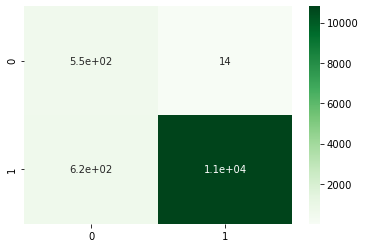

time: 381 ms (started: 2021-11-16 18:31:47 -06:00)


In [36]:
from sklearn.metrics import confusion_matrix

print(sns.heatmap(confusion_matrix(dt_pred, y_test), annot = True , cmap= 'Greens'))

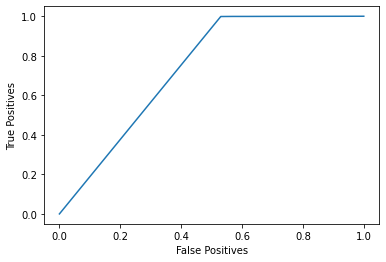

time: 184 ms (started: 2021-11-16 18:27:28 -06:00)


In [32]:
from sklearn.metrics import roc_curve

fp, tp, threshold = roc_curve(y_test, dt_grid.predict_proba(X_test)[:,1])

plt.plot(fp, tp)
plt.xlabel("False Positives")
plt.ylabel("True Positives")
plt.show()

Since the Area Under Curve is between 0.5 and 1 we can say that there is a high chance of our model to classify between positive and negative classes.